<a href="https://colab.research.google.com/github/RowanHoupa35/ML-TD1/blob/main/FormationML/td_arbres_knn_new_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD: arbres de décisions, méthodes ensemblistes et plus proches voisins

La séance d'aujourd'hui porte sur l'utilisation d'autres techniques de classification.

Le problème que l'on va traiter est celui de la prédiction du cancer à partir d'images d'histologie.

Les caractéristiques correspondent à des statistiques (moyenne, variance, valeurs extrémales) de certaines caractéristiques des noyaux des cellules.

C'est un jeu de données classique en Machine Learning. Une description plus complète est disponible à partir du [lien](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

<img src=https://www.frontiersin.org/files/Articles/572671/fdgth-02-572671-HTML/image_m/fdgth-02-572671-g001.jpg />

Exécuter les commandes suivantes pour charger l'environnement et les données dans la variable `data_all`.


In [2]:
# Librairies scientifique et visualisation utiles standard
%matplotlib inline
from pylab import *

import numpy as np
import random
import matplotlib.pyplot as plt

# Lecture des données
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()
X=data_all['data']
y=data_all['target']

# Nom des caractéristiques
fnames=data_all['feature_names'].tolist()

# Nom des classes
targets=data_all['target_names'].tolist()

# Pour séparer les données en apprentissage et test
from sklearn.model_selection import train_test_split

# Répartition en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.4)

# Données d'apprentissage réparties en fonction des classes
X0 = X_train[y_train == 0,:]
X1 = X_train[y_train == 1,:]


## Analyse préliminaire des données

Quel est le type de données, quelle est leur taille, leur type, le nombre de classes, le nombre d'échantillons, existe-t-il des dimensions de l'espace des caractéristiques qui semblent discriminantes?

Inspirez-vous des codes du TD précédent (visualistion d'histogrammes, de paires de caractéristiques, etc.) pour appréhender la complexité des données.


Les données sont de dimension 30
Le nombre de données d'apprentissage est 569
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean compactness        569 non-null    float64
 1   mean concavity          569 non-null    float64
 2   mean concave points     569 non-null    float64
 3   mean symmetry           569 non-null    float64
 4   mean fractal dimension  569 non-null    float64
 5   class                   569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB

 None


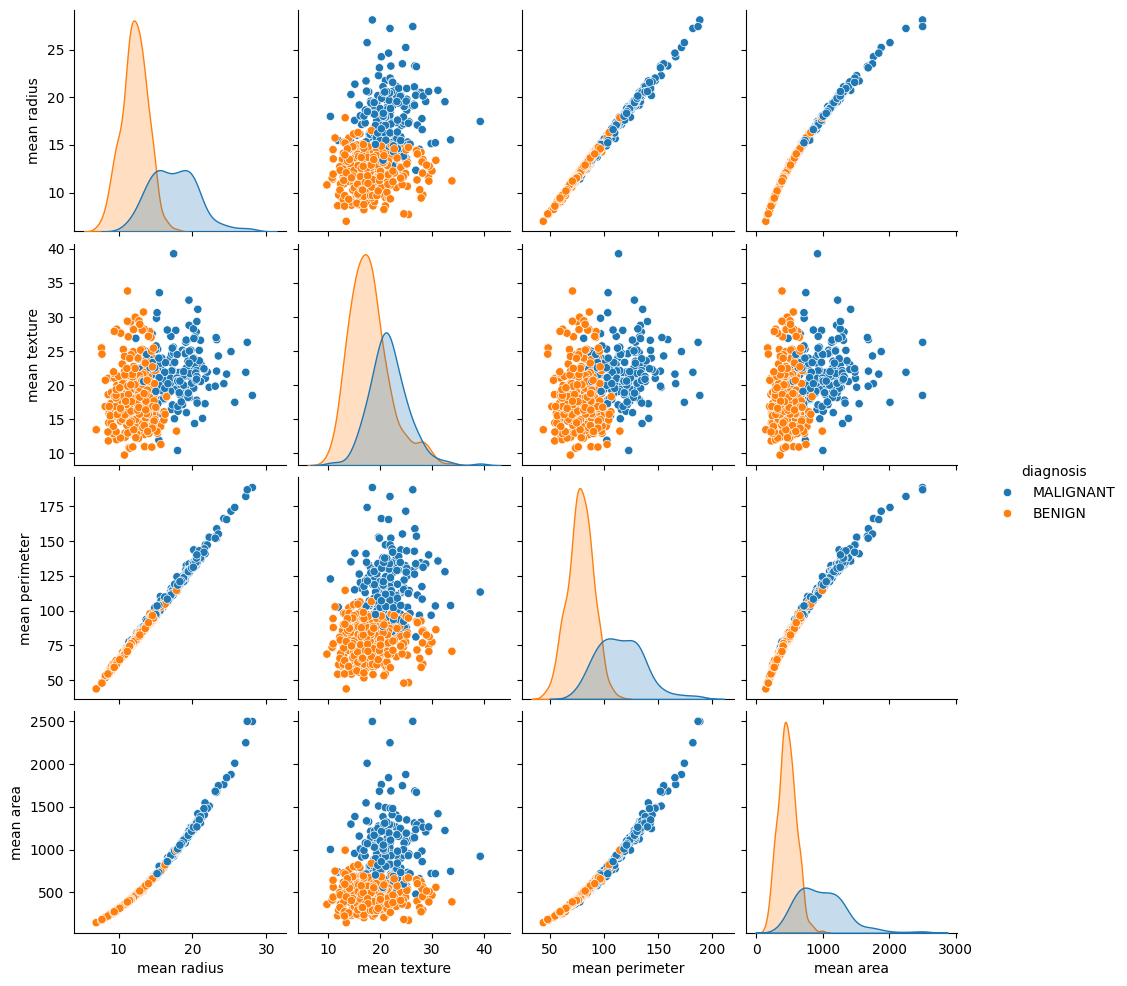

In [2]:
###############################
## Mettre votre code ici
###############################
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Chargement des données
data = load_breast_cancer()
X = data.data
y = data.target

# Création du DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['class'] = y

print("Les données sont de dimension", X.shape[1])
print("Le nombre de données d'apprentissage est", len(X))

# Affichage des informations du DataFrame
print("\n", df[['mean compactness', 'mean concavity', 'mean concave points',
                'mean symmetry', 'mean fractal dimension', 'class']].info())

# Pairplot avec quelques caractéristiques
features_viz = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'class']
df_viz = df[features_viz].copy()
df_viz['diagnosis'] = df_viz['class'].map({0: 'MALIGNANT', 1: 'BENIGN'})

g = sns.pairplot(df_viz, hue='diagnosis', vars=features_viz[:-1])
plt.show()

print(g)




## Apprentissage d'un arbre de décision

On utilisera la bibliothèque scikit-learn [`tree`](https://scikit-learn.org/stable/modules/tree.html) pour

* Construire l'arbre sur les données d'entrainement
* Visualiser la structure de l'arbre
* Prédire le diagnostic sur les données de test
* Calculer l'erreur et la matrice de confusion

Regarder la fiche décrivant la fonction d'apprentissage d'un [arbre de décision](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), et étudier ses paramètres en vous rapportant au cours.

Faire varier certains paramètres (profondeur max, pureté, critère...) et visualisez leur influence.


### Définition de la structure de l'arbre

Erreur de classification: 0.105
Précision: 0.895


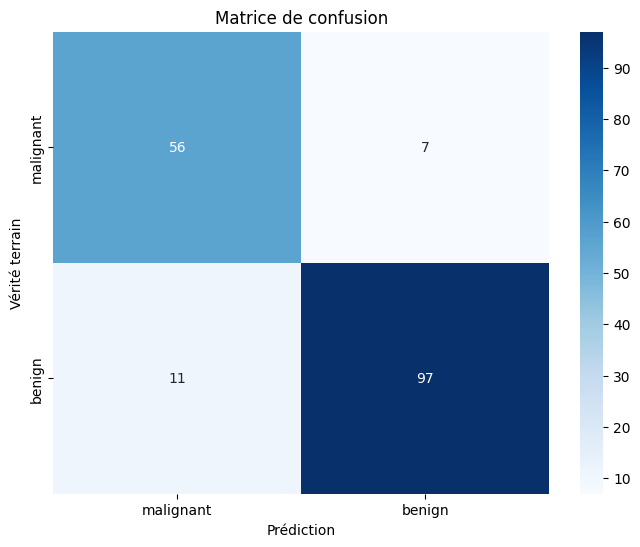


=== Influence de la profondeur max ===
Profondeur 2: Précision = 0.918
Profondeur 3: Précision = 0.971
Profondeur 5: Précision = 0.953
Profondeur 10: Précision = 0.965
Profondeur None: Précision = 0.965

=== Influence du critère ===
Critère entropy: Précision = 0.953
Critère gini: Précision = 0.953

=== Influence de min_samples_split ===
min_samples_split 2: Précision = 0.965
min_samples_split 10: Précision = 0.959
min_samples_split 50: Précision = 0.918
min_samples_split 100: Précision = 0.918


In [3]:
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Noms des caractéristiques et des classes
fnames = data.feature_names
targets = data.target_names

# Séparation des données en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###############################
## Faire varier les paramètres
###############################

clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=5,
                                  min_samples_split=200,
                                  min_samples_leaf=100,
                                  splitter="best",
                                  random_state=None)
clf = clf.fit(X_train, y_train)

# Visualisation de l'arbre
dot_data = tree.export_graphviz(clf, out_file=None,
                    feature_names=fnames,
                    class_names=targets,
                    filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Prédictions sur les données de test
y_pred = clf.predict(X_test)

# Calcul de l'erreur et matrice de confusion
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

print(f"Erreur de classification: {error:.3f}")
print(f"Précision: {accuracy:.3f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=targets, yticklabels=targets)
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

###############################
## Variation des paramètres
###############################

# Test avec différentes profondeurs max
print("\n=== Influence de la profondeur max ===")
for depth in [2, 3, 5, 10, None]:
    clf_depth = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    clf_depth.fit(X_train, y_train)
    y_pred_depth = clf_depth.predict(X_test)
    acc_depth = accuracy_score(y_test, y_pred_depth)
    print(f"Profondeur {depth}: Précision = {acc_depth:.3f}")

# Test avec différents critères
print("\n=== Influence du critère ===")
for criterion in ["entropy", "gini"]:
    clf_crit = tree.DecisionTreeClassifier(criterion=criterion, max_depth=5, random_state=42)
    clf_crit.fit(X_train, y_train)
    y_pred_crit = clf_crit.predict(X_test)
    acc_crit = accuracy_score(y_test, y_pred_crit)
    print(f"Critère {criterion}: Précision = {acc_crit:.3f}")

# Test avec différentes valeurs de min_samples_split
print("\n=== Influence de min_samples_split ===")
for min_split in [2, 10, 50, 100]:
    clf_split = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=min_split, random_state=42)
    clf_split.fit(X_train, y_train)
    y_pred_split = clf_split.predict(X_test)
    acc_split = accuracy_score(y_test, y_pred_split)
    print(f"min_samples_split {min_split}: Précision = {acc_split:.3f}")

## Calcul de l'arbre

Dans cet partie, on va chercher à recalculer les valeurs fournies par la fonction de la bibliothèque.

On va chercher dans un premier temps à retrouver les valeurs du premier noeud (entropie, samples, value, class).

Calculer les probabilités

Pour rappel, l'entropie de la variable $Y$ se calcule selon:

$$ H(Y)= -\sum_k P(Y=k) \log_2 P(Y=k)$$

La fonction logarithme en base 2 est`log2` dans python.

Les probabilités peuvent s'estimer selon:

$$ P(Y_k) = \frac{n_k}{N} $$

où $n_k$ est le nombre d'échantillons de la classe $k$, et $N$ est le nombre total d'achantillons de la variable aléatoire $Y$.

In [4]:
import numpy as np

# Données fournies dans l'énoncé
n0 = 127  # nombre d'échantillons de classe 0 (malignant)
n1 = 214  # nombre d'échantillons de classe 1 (benign)

###############################
## Mettre votre code ici
###############################

n = n0 + n1  # nombre total d'échantillons

# Calcul des probabilités
p0 = n0 / n  # P(Y=0)
p1 = n1 / n  # P(Y=1)

# Calcul de l'entropie (en évitant log(0))
entropy = 0
if p0 > 0:
    entropy -= p0 * np.log2(p0)
if p1 > 0:
    entropy -= p1 * np.log2(p1)

# Détermination de la classe majoritaire
if n1 > n0:
    class_estim = "benign"
else:
    class_estim = "malignant"

###############################

print("== Pour le noeud racine ==")
print("samples = {}".format(n))
print("value = [{}, {}]".format(n0,n1))
print("entropy = {:.3f}".format(entropy))
print("class = {}".format(class_estim))

== Pour le noeud racine ==
samples = 341
value = [127, 214]
entropy = 0.953
class = benign


Même question pour les deux noeuds connectés au premier.

Repérer sur la visualisation du graphe le nom de la caractéristique à tester, et les seuils définissant le test.

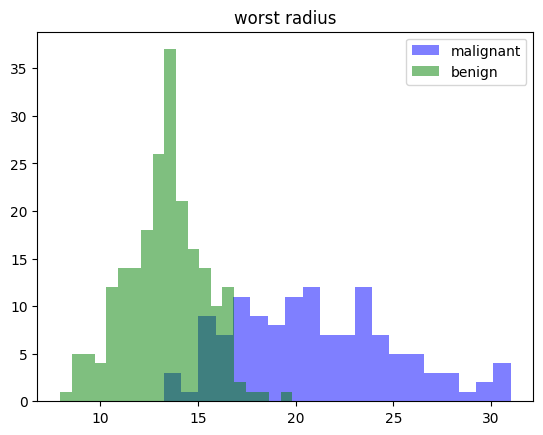

== Pour le noeud gauche ==
samples=112
value=[107, 5]
entropy 0.263
class = malignant

== Pour le noeud droit ==
samples=229
value=[20, 209]
entropy 0.428
class = benign


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pour récupérer l'indice d'une caractéristique
fname = 'worst radius'
i = fnames.index(fname)

# Séparation des données par classe
X0 = X_train[y_train == 0]  # Classe 0 (malignant)
X1 = X_train[y_train == 1]  # Classe 1 (benign)

# Histogrammes des valeurs d'attributs pour chacune des classes
plt.hist(X0[:,i], color='b', alpha=0.5, bins=20, label=targets[0])
plt.hist(X1[:,i], color='g', alpha=0.5, bins=20, label=targets[1])
plt.title(fname)
plt.legend(loc='upper right')
plt.show()

# Seuil du premier noeud
seuil = 16.795

###############################
## Mettre votre code ici
###############################

# Noeud gauche : worst radius <= 16.795
mask_gauche = X_train[:, i] <= seuil
X_gauche = X_train[mask_gauche]
y_gauche = y_train[mask_gauche]

n0_gauche = np.sum(y_gauche == 0)  # malignant
n1_gauche = np.sum(y_gauche == 1)  # benign
n_gauche = len(y_gauche)

# Calcul de l'entropie pour le noeud gauche
p0_gauche = n0_gauche / n_gauche
p1_gauche = n1_gauche / n_gauche

entropy_gauche = 0
if p0_gauche > 0:
    entropy_gauche -= p0_gauche * np.log2(p0_gauche)
if p1_gauche > 0:
    entropy_gauche -= p1_gauche * np.log2(p1_gauche)

# Classe majoritaire pour le noeud gauche
if n0_gauche > n1_gauche:
    class_estim_gauche = "malignant"
else:
    class_estim_gauche = "benign"

# Noeud droit : worst radius > 16.795
mask_droit = X_train[:, i] > seuil
X_droit = X_train[mask_droit]
y_droit = y_train[mask_droit]

n0_droit = np.sum(y_droit == 0)  # malignant
n1_droit = np.sum(y_droit == 1)  # benign
n_droit = len(y_droit)

# Calcul de l'entropie pour le noeud droit
p0_droit = n0_droit / n_droit
p1_droit = n1_droit / n_droit

entropy_droit = 0
if p0_droit > 0:
    entropy_droit -= p0_droit * np.log2(p0_droit)
if p1_droit > 0:
    entropy_droit -= p1_droit * np.log2(p1_droit)

# Classe majoritaire pour le noeud droit
if n0_droit > n1_droit:
    class_estim_droit = "malignant"
else:
    class_estim_droit = "benign"

###############################

print("== Pour le noeud gauche ==")
print("samples = {}".format(n_gauche))
print("value = [{}, {}]".format(n0_gauche, n1_gauche))
print("entropy = {:.3f}".format(entropy_gauche))
print("class = {}".format(class_estim_gauche))

print("\n== Pour le noeud droit ==")
print("samples = {}".format(n_droit))
print("value = [{}, {}]".format(n0_droit, n1_droit))
print("entropy = {:.3f}".format(entropy_droit))
print("class = {}".format(class_estim_droit))

### Evaluation des performances du prédicteur.

Calculer la matrice de confusion, c'est à dire la matrice dont les coefficient $C_{ij}$ contient le nombre d'éléments de la classe $i$ prédits comme étant de la classe $j$.

On pourra utiliser la bibliothèque [`model_evaluation`](https://scikit-learn.org/stable/modules/model_evaluation.html).


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Prédictions sur les données de test
y_pred = clf.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Calcul de l'erreur de prédiction
accuracy = accuracy_score(y_test, y_pred)
error_rate = (1 - accuracy) * 100

# Affichage des résultats
print(f"Erreur de prédiction: {error_rate:.1f}%")
print(cm)

Erreur de prédiction: 10.5%
[[56  7]
 [11 97]]



## Bagging

L'objectif de cette partie est de construire une approche de "bagging".

Le principe de l'approche est:

* Apprendre et collecter plusieurs arbres sur des échantillonnages aléatoires des données d'apprentissage
* Agréger les prédictions par vote
* Définir la classe prédite à partir des prédictions agrégées

Utiliser la fonction de scikit_learn [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) pour développer une approche de Bagging.

Mettre en évidence l'influence des paramètres, de l'aléatoire, de la nature du problème, des caractéristiques des arbres (profondeur), du nombre d'arbres sur les performances.


In [4]:
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

############################
# METTRE VOTRE CODE ICI
############################

# Arbre de décision simple
clf_tree = tree.DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
perf_tree = accuracy_score(y_test, y_pred_tree)

# Bagging avec arbres de décision
bagging_clf = BaggingClassifier(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
perf_bagging = accuracy_score(y_test, y_pred_bagging)

print("DTree Error = {:.1f}%".format(100*(1-perf_tree)))
print("DTree+Bagging Error = {:.1f}%".format(100*(1-perf_bagging)))

DTree Error = 5.8%
DTree+Bagging Error = 4.1%


## Plus proches voisins

On va maintenant étudier un autre algorithme "explicable" pour réaliser la prédiction.

Utiliser la fonction de scikit-learn [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) et trouver un bon jeu de paramètres (par exemple en faisant une boucle sur ces paramètres).

Tester sur différents problèmes de prédiction.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for metric in ['l1','l2','cosine']:
  for nn in arange(1,11):
    knn = KNeighborsClassifier(n_neighbors=nn, metric = metric)
    knn.fit(X_train, y_train)

    print("{:8s} {:2d}-NN Error = {:.1f}%".format(metric, nn,100*(1-knn.score(X_test, y_test))))


l1        1-NN Error = 6.6%
l1        2-NN Error = 9.2%
l1        3-NN Error = 6.6%
l1        4-NN Error = 7.5%
l1        5-NN Error = 7.0%
l1        6-NN Error = 7.0%
l1        7-NN Error = 6.6%
l1        8-NN Error = 6.6%
l1        9-NN Error = 5.7%
l1       10-NN Error = 5.3%
l2        1-NN Error = 7.5%
l2        2-NN Error = 9.2%
l2        3-NN Error = 7.9%
l2        4-NN Error = 7.9%
l2        5-NN Error = 7.5%
l2        6-NN Error = 7.5%
l2        7-NN Error = 7.0%
l2        8-NN Error = 7.5%
l2        9-NN Error = 6.6%
l2       10-NN Error = 7.0%
cosine    1-NN Error = 8.8%
cosine    2-NN Error = 10.5%
cosine    3-NN Error = 8.8%
cosine    4-NN Error = 11.8%
cosine    5-NN Error = 9.6%
cosine    6-NN Error = 11.0%
cosine    7-NN Error = 9.2%
cosine    8-NN Error = 9.2%
cosine    9-NN Error = 9.6%
cosine   10-NN Error = 9.2%


### Bagging des kNN?

Une méthode de bagging est-elle possible?

Permet-elle d'améliorer les performances?

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###############################
# METTRE CODE ICI
###############################

# kNN simple
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
perf_knn = accuracy_score(y_test, y_pred_knn)

# Bagging avec kNN
knn_bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
knn_bagging.fit(X_train, y_train)
y_pred_knn_bagging = knn_bagging.predict(X_test)
perf_knn_bagging = accuracy_score(y_test, y_pred_knn_bagging)

print("kNN Error = {:.1f}%".format(100*(1-perf_knn)))
print("kNN+Bagging Error = {:.1f}%".format(100*(1-perf_knn_bagging)))

kNN Error = 4.1%
kNN+Bagging Error = 3.5%


## Normalisation des données

Les caractéristiques peuvent avoir des distributions très différentes entre-elles. Il peut être nécessaire de les normaliser pour pouvoir les comparer.


### Comparaison des distributions


Visualiser les variances des caractéristiques.

On pourra utiliser la fonction de normalisation [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) pour calculer les variances et transformer les données.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

print(np.log(np.array(scaler.var_)))


[  2.48107534   3.0336091    6.34151376  11.61892432  -8.65357697
  -5.86713734  -5.01957311  -6.54131569  -7.10947159  -9.85987554
  -2.97509035  -1.24997243   1.05357724   7.01388757 -11.55504798
  -7.95097935  -6.72015753 -10.0869017   -9.45792119 -11.66007015
   3.13013858   3.69870075   7.01025623  12.61238051  -7.57322405
  -3.59576584  -2.96536528  -5.3874798   -5.47245996  -7.92091523]


### Normalisation pour les plus proches voisins

Comparer les résultats de classification avec les données normalisées (en moyenne et variance).

Avez-vous une explication de la différence?

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

############################################
# METTRE VOTRE CODE ICI
############################################

# kNN sans normalisation
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
perf_knn = accuracy_score(y_test, y_pred_knn)

# Normalisation des données
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# kNN avec données normalisées
knn_norm = KNeighborsClassifier(n_neighbors=5)
knn_norm.fit(X_train_norm, y_train)
y_pred_knn_norm = knn_norm.predict(X_test_norm)
perf_knn_norm = accuracy_score(y_test, y_pred_knn_norm)

print("kNN Error = {:.1f}%".format(100*(1-perf_knn)))
print("kNN Error + Normalization = {:.1f}%".format(100*(1-perf_knn_norm)))

kNN Error = 4.1%
kNN Error + Normalization = 4.1%


### Comparaison de l'impact de la normalisation sur d'autres algorithmes

Reprendre les codes du TD précédent et esimer les performances d'un classifieur bayésien naïf.

Comparer avec et sans normalisation des données. Expliquer la différence de comportement avec le kNN.

Qu'en est-il avec les arbres de décision?

In [ ]:
from sklearn.naive_bayes import GaussianNB # code à compléter

# Définition du modèle
clf = GaussianNB()

# Calcul des paramètres du modèle
clf.fit(X_train, y_train)
print("Naive Bayesian: Error = {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

# Calcul des paramètres du modèle
clf.fit(Xt_train, y_train)
print("Naive Bayesian + NormaliZation: Error = {:.2f}%".format(100*(1-clf.score(Xt_test, y_test))))


Naive Bayesian: Error = 5.70%
Naive Bayesian + NormaliZation: Error = 6.58%


In [ ]:

# Définition du modèle
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_split=30, splitter="best")

# Calcul des paramètres du modèle
clf.fit(X_train, y_train)
print("DTree: Error = {:.2f}%".format(100*(1-clf.score(X_test, y_test))))

# Calcul des paramètres du modèle
clf.fit(Xt_train, y_train)
print("DTree + NormaliZation: Error = {:.2f}%".format(100*(1-clf.score(Xt_test, y_test))))


DTree: Error = 8.33%
DTree + NormaliZation: Error = 8.33%
